# EDA PROJECT 2

# Q1:Load the dataset into pandas and provide a summary of columns in the loaded dataset without any modification.

In [590]:
#Importing all required libraries and aliasing them. 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [591]:
# importing the CSV file
df=pd.read_csv("all_data_copy.csv")

######  Given data set contains the below columns and there inferance::
###### ----------------------------------------------------------------------------------------------
###### Order ID: given information of Order ID that which order is taken
###### Product : this the information of what product costumer have purchased
###### Quantity Ordered: number of product quantity ordered
###### Price Each: Provides the price of the each product
###### Order Date: Date at which order has been putted on
###### Purchase Address: Delivery address of the which product to be delivered at


In [592]:
#Structure of the data # top 5 rows will display
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [593]:
# stuture of the dataset
df.shape

(373700, 6)

In [594]:
# Gives the information about the data set:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373700 entries, 0 to 373699
Data columns (total 6 columns):
Order ID            372610 non-null object
Product             372610 non-null object
Quantity Ordered    372610 non-null object
Price Each          372610 non-null object
Order Date          372610 non-null object
Purchase Address    372610 non-null object
dtypes: object(6)
memory usage: 17.1+ MB


In [595]:
# Checking for the dataset for  null values
df.isnull().sum()

Order ID            1090
Product             1090
Quantity Ordered    1090
Price Each          1090
Order Date          1090
Purchase Address    1090
dtype: int64

In [597]:
sum(df.isnull().sum())/len(df)*100# calculating null value % in data

1.75006689858175

###### Around 1.76% of the of overall missing values are present - we can neglect them by deleting we can delete the null values up to maximum of 25% of overall data


In [598]:
df = df.dropna(how='any',axis=0)

# 2-Prepare the data frame for further analysis. Clean it, mold it in any manner you see it


In [599]:
df.isnull().sum()# calculation of null values in each column count


Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

###### Hindling the duplicate values 

In [600]:
df.duplicated().value_counts()

True     186923
False    185687
dtype: int64

In [601]:
df=df.drop_duplicates()

In [602]:
df['Order ID'].duplicated().value_counts()


False    178438
True       7249
Name: Order ID, dtype: int64

###### Post deleting the all the duplicated values we have the Order ID with 7249 where this are the id's which combo purchased are done- this records are used 

In [603]:
#Deleting the duplicated headers
Indexdel=df[df['Quantity Ordered'] == 'Quantity Ordered'].index
df.drop(Indexdel,inplace=True)


In [606]:
#Converting the required columns into required data types:

df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Quantity Ordered'] = df['Quantity Ordered'].astype('int')
df['Price Each'] = df['Price Each'].astype('float')


In [607]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185686 entries, 0 to 186849
Data columns (total 6 columns):
Order ID            185686 non-null object
Product             185686 non-null object
Quantity Ordered    185686 non-null int32
Price Each          185686 non-null float64
Order Date          185686 non-null datetime64[ns]
Purchase Address    185686 non-null object
dtypes: datetime64[ns](1), float64(1), int32(1), object(3)
memory usage: 9.2+ MB


In [608]:
df.describe()

,Quantity Ordered,Price Each
count,185686.000000,185686.000000
mean,1.124544,184.519255
std,0.443069,332.843838
min,1.000000,2.990000
25%,1.000000,11.950000
50%,1.000000,14.950000
75%,1.000000,150.000000
max,9.000000,1700.000000


#### Summary of cleaning the data set:
    
 ####   1.Shape- Provides the inforamtion about the data set rows and columsn
 ####   2.Describe- Gives the statistical information about numeric columns
####    3.info- givens the information about columns datatype
 ####   4.Deleting the null values 
 ####   5.Checking the duplicated values and deleting them
 ####   6.Type casting the columns with the appropriate data types

### Q4a:Which City has the higest sales Overall?

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

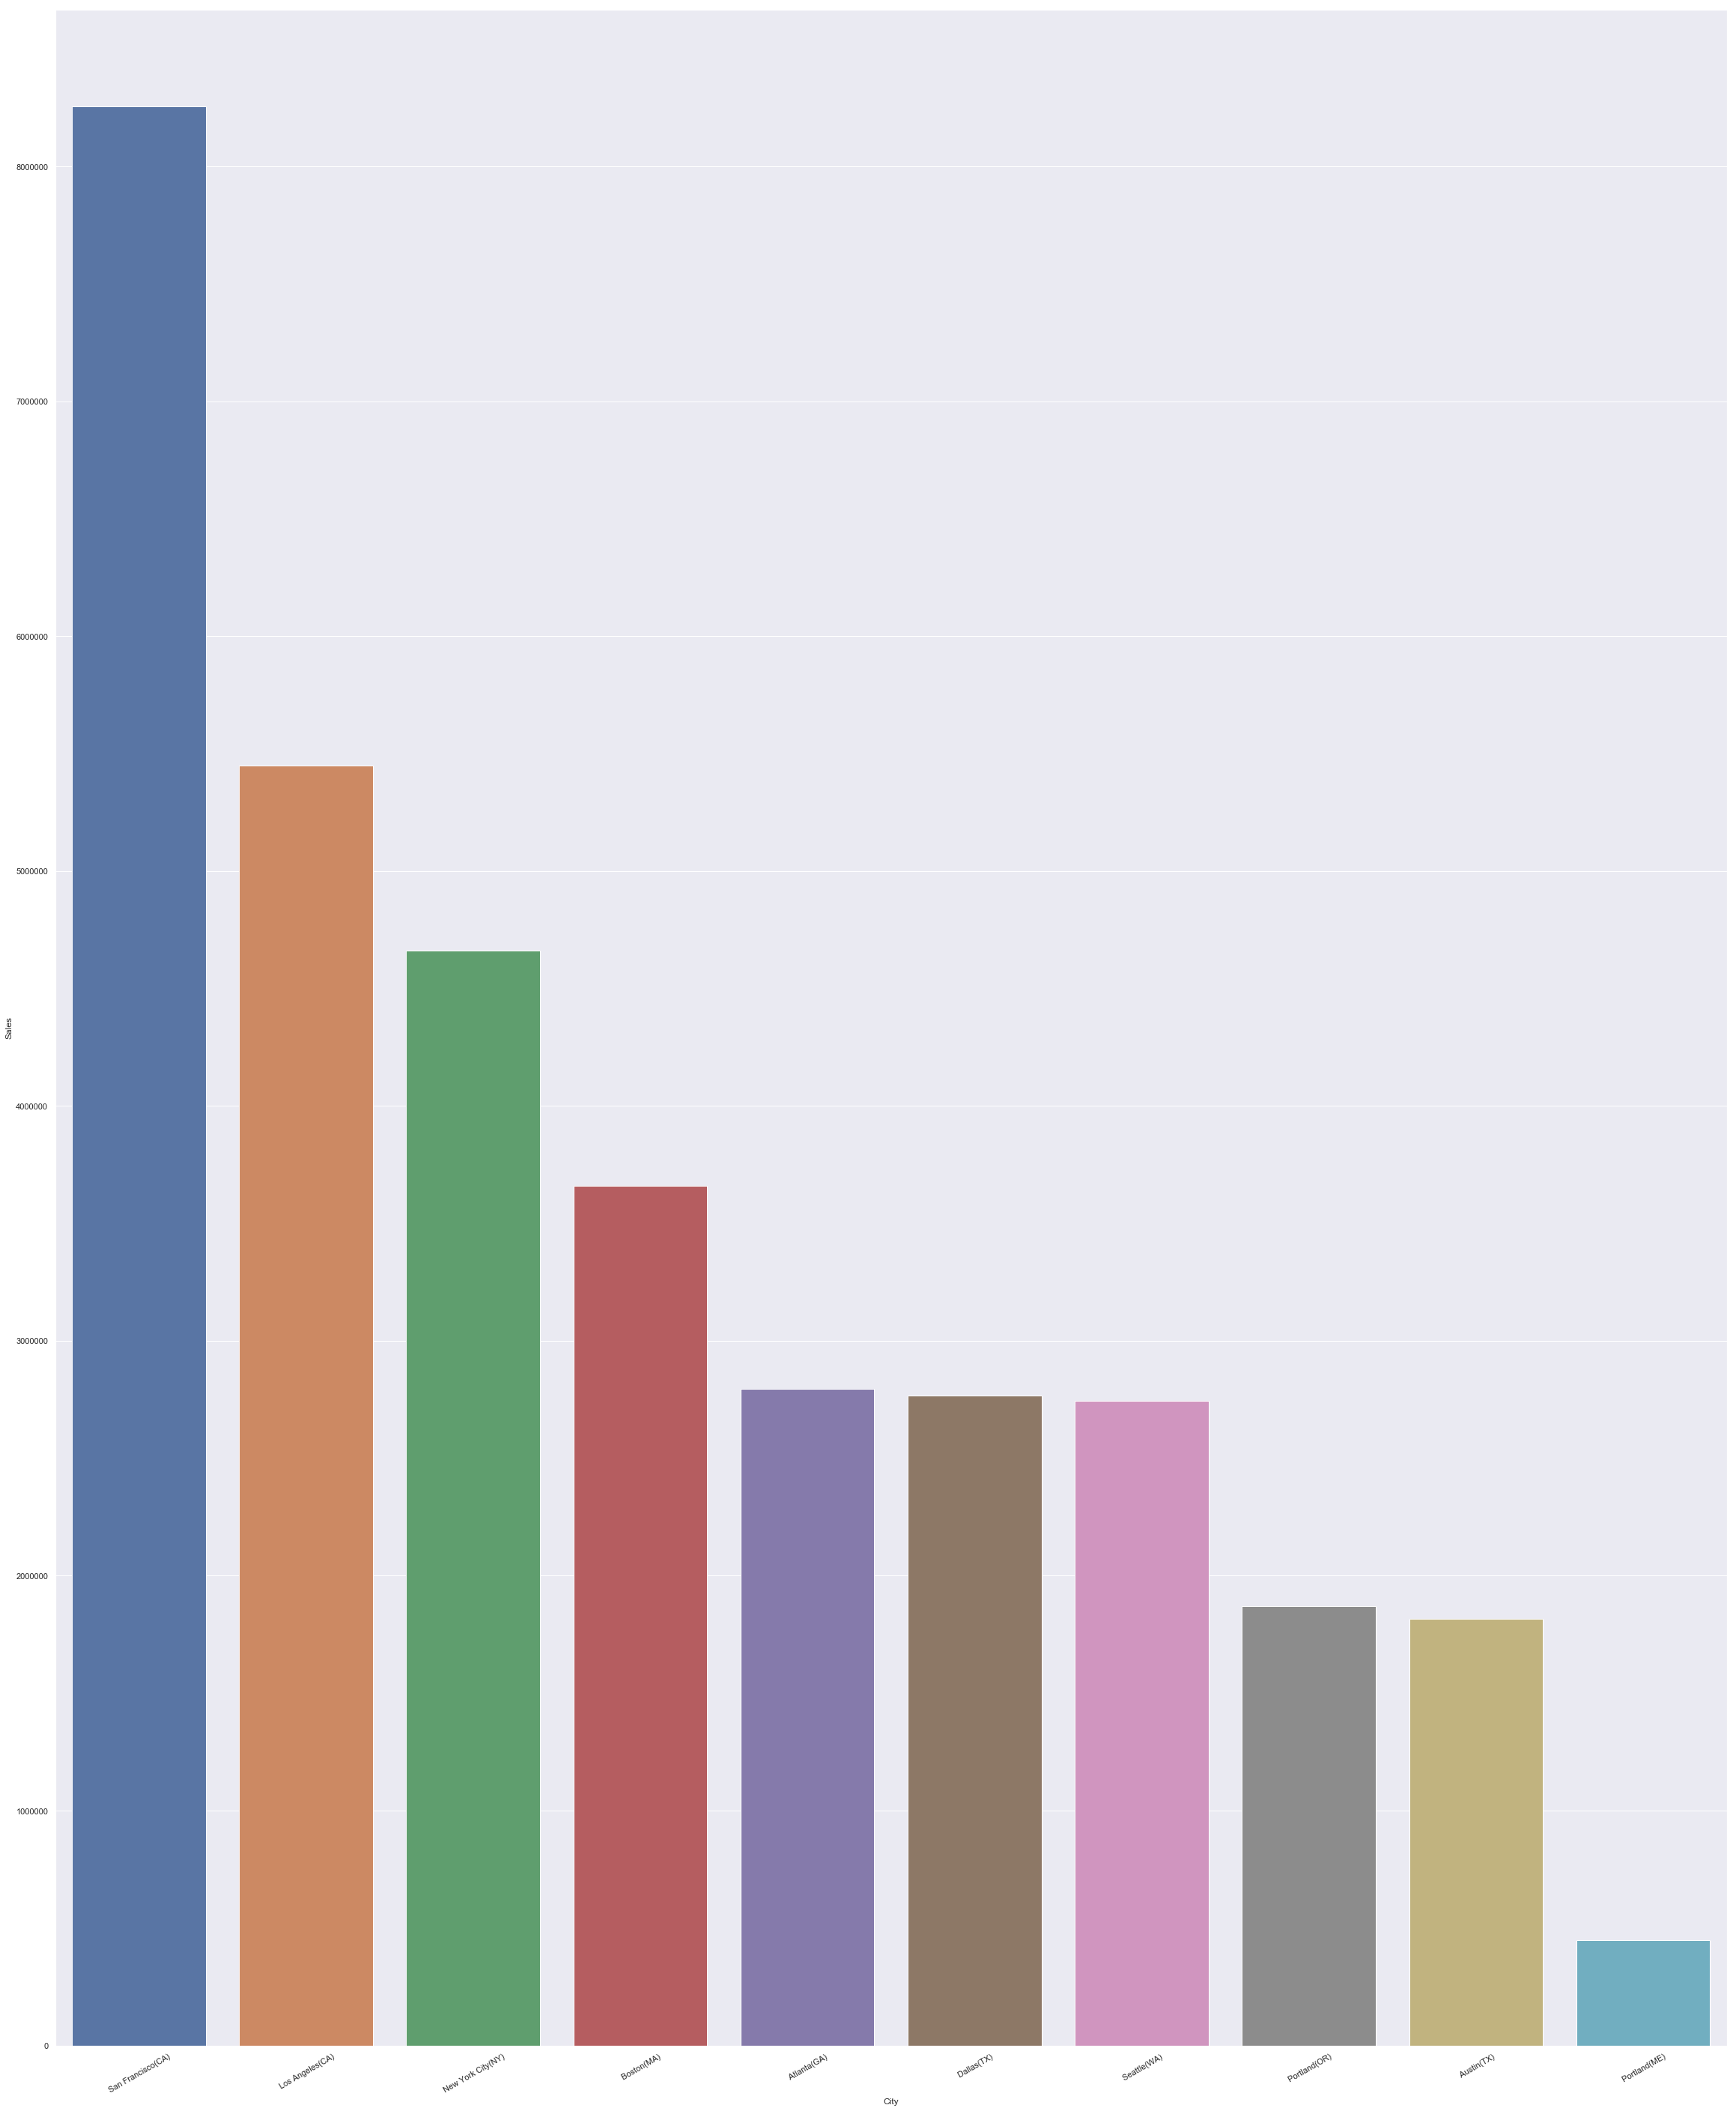

In [619]:
#Creating a new column city
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return (address.split(',')[2]).split(' ')[1]

# Creating a new column city from the Purchase address
df["City"]= df['Purchase Address'].apply(lambda x:get_city(x)+'('+get_state(x)+')')

df["Sales"]=df['Quantity Ordered']*df['Price Each']

City_sales=df[["City","Sales"]].groupby(['City'], as_index=False).sum().sort_values(by='Sales', ascending=False)
 # plotting the bar graph with X axis with city and Y axis with the sales
k=sns.barplot(x='City', y='Sales' , data =City_sales)
sns.set(rc={'figure.figsize':(15,15)})
plt.xticks(rotation=30)


######  Observation: by observing the above analysis we can say that San Francisco has the higest sales 

### Q4b: Which month had the highest amount of sales overall?

In [614]:
# Creating a month column from the Order Date
df['Month']=df['Order Date'].dt.month_name()
#df['hour']=df['Order Date'].dt.hour()

# Below code gives the info about the Monthly sales
Month_sales=df[["Month","Sales"]].groupby(['Month'], as_index=False).sum().sort_values(by='Sales', ascending=False)
Month_sales



,Month,Sales
2,December,4.608296e+06
10,October,3.734778e+06
0,April,3.389218e+06
9,November,3.197875e+06
8,May,3.150616e+06
7,March,2.804973e+06
5,July,2.646461e+06
6,June,2.576280e+06
1,August,2.241083e+06
3,February,2.200078e+06


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

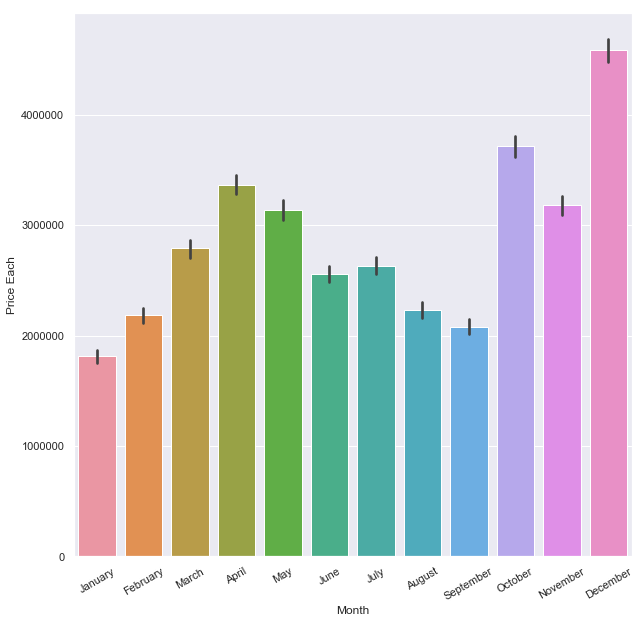

In [573]:
# Plotting the grap for the higest sales in month wise
k=sns.barplot(x='Month', y='Price Each' , data =df, estimator=sum)
sns.set(rc={'figure.figsize':(8,8)})
plt.xticks(rotation=30)

###### Summary:Based on the analysis we could say that sales are high in december  (we can assume that the high sales in decembers possible the festiv offer and year end sales)

### Q4c: Most bought products per city.

In [616]:
Product_sales=df[["City","Product"]].groupby(['City'], as_index=False).sum()

Product_sales

,City,Product
0,Atlanta(GA),AA Batteries (4-pack)USB-C Charging CableLight...
1,Austin(TX),Wired HeadphonesFlatscreen TVUSB-C Charging Ca...
2,Boston(MA),iPhoneApple Airpods HeadphonesBose SoundSport ...
3,Dallas(TX),27in 4K Gaming Monitor27in 4K Gaming MonitorLi...
4,Los Angeles(CA),27in FHD Monitor27in 4K Gaming MonitorBose Sou...
5,New York City(NY),Apple Airpods HeadphonesAA Batteries (4-pack)A...
6,Portland(ME),USB-C Charging CableAAA Batteries (4-pack)AAA ...
7,Portland(OR),Lightning Charging Cable27in FHD MonitorGoogle...
8,San Francisco(CA),Wired HeadphonesAAA Batteries (4-pack)USB-C Ch...
9,Seattle(WA),AAA Batteries (4-pack)Flatscreen TVAAA Batteri...


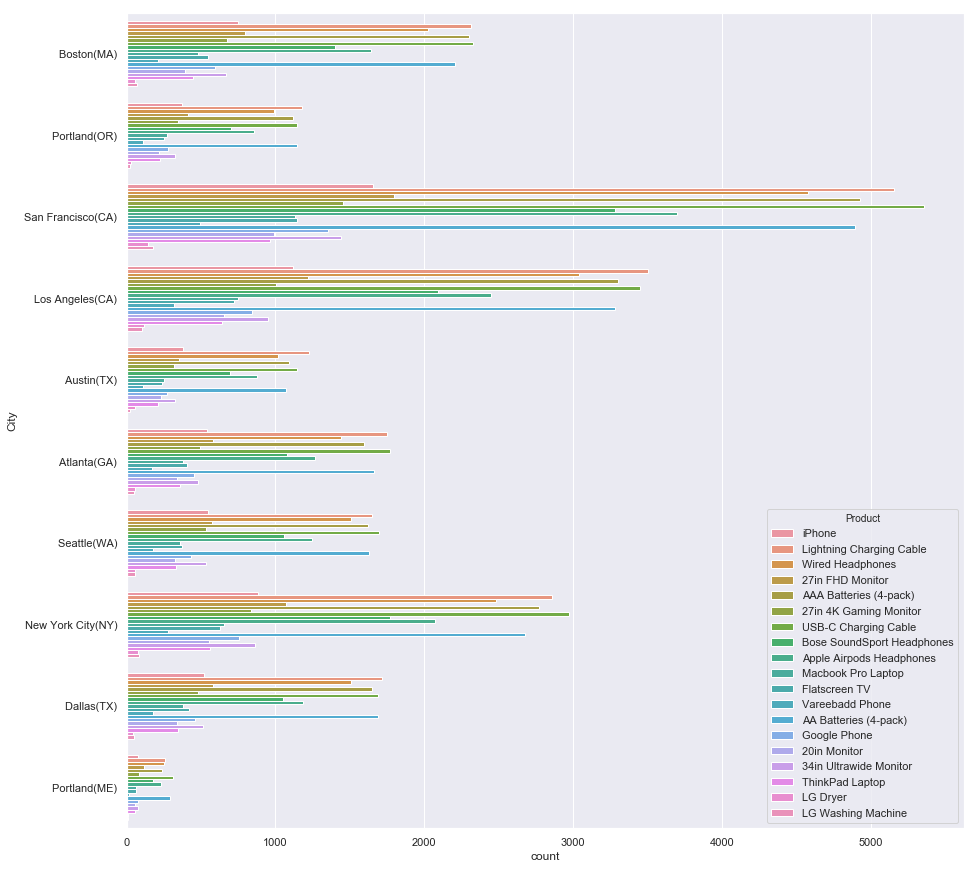

In [620]:
#plotting the graph with the Count of products for eaach city
sns.countplot(y=df['City'], hue=df.Product)
sns.set(rc={'figure.figsize':(40,50)})

###### Q4C   Based on our analysis we are observing the most of the cities sales are high for products USB- Charging cable and  Lighting charging cable that the reason while most of the customer has he USB- C charging cable and Lighting Charging cable compatable phones.
Boston - most saled product USB-C Charging cable<br>
Portland(OR)-most saled product LightninCharging Cable<br>
San Francisco-most saled productUSB-C Charging cable<br>
Los Angeles-most saled product LightninCharging Cable<br>
Austin-most saled productLightingCharging Cable<br>
Atlanta-most saled product USB-C Charging cable<br>
Seattle-most saled productUSB-C Charging cable<br>
New York City-most saled product USB-C Charging cable<br>
Dallas-most saled product LightninCharging Cable<br>
Portland-most saled product USB-C Charging cable<br>

#####  It's clear that the San Francisco is the most sales city, we can provide an insight that the we can proceed to setup a new branch in San Francisco and that not only boost our sales but also increase the visiting capacity of the costumers with leads to a greater profit


#### Q5a:What products are mostly sold at different times of the day?

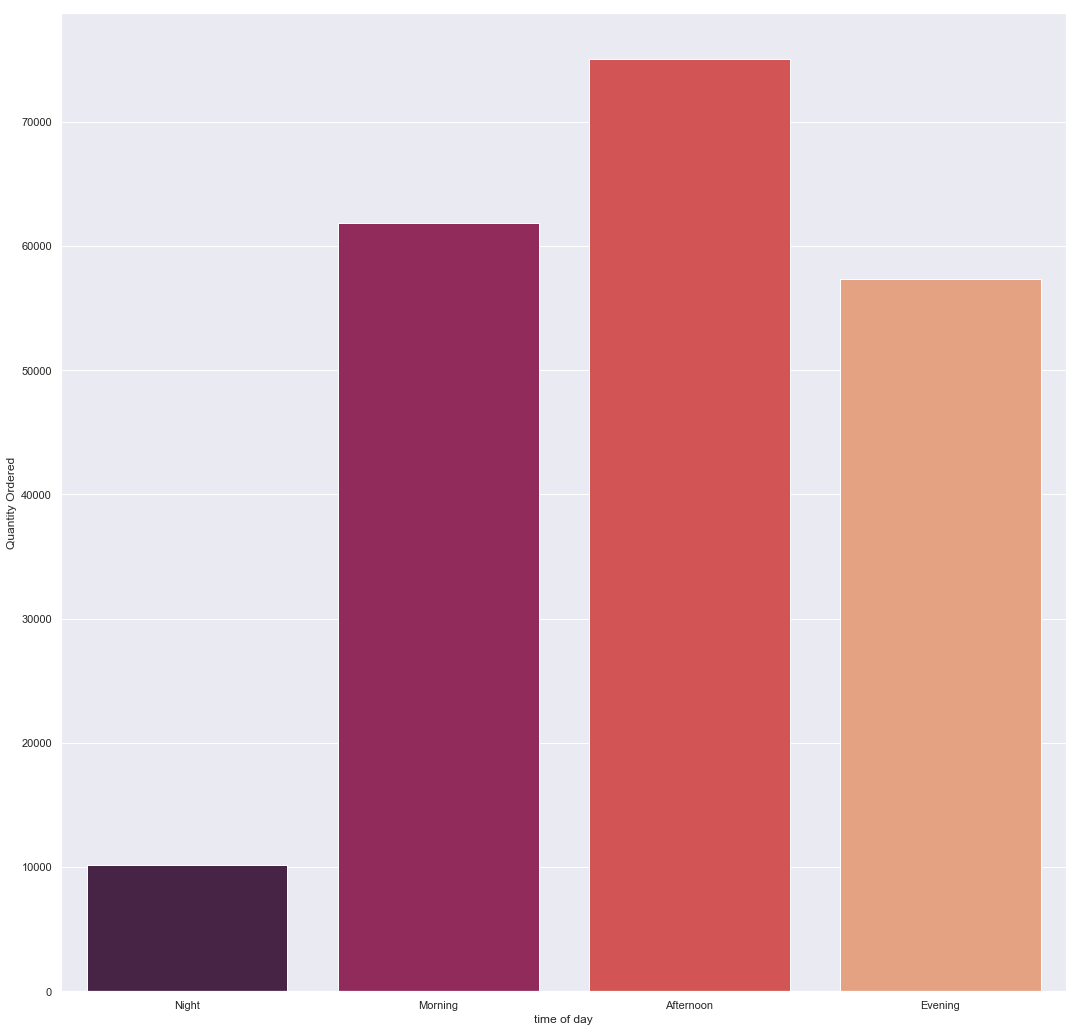

In [624]:
# Creating a hour column from the Order date
df['hour']=df['Order Date'].dt.hour
# Creating a time of day column from the hour
df['time of day']= pd.cut(df['Order Date'].dt.hour,# Her we are using the cut method to use the make it a categorical data
                          [0,6,12,18,23],
                          labels=['Night','Morning','Afternoon','Evening'])

# summing the all the likely categories and grouping them
day_clasify= df.groupby('time of day').sum().sort_values('Price Each')
# plotting the bar graph with X as indexed values and Y as Quantity ordered
sns.barplot(x= day_clasify.index, y= day_clasify['Quantity Ordered'], palette='rocket')
sns.set(rc={'figure.figsize':(8,8)})

##### It's clear from the graph that Afternoon has the higest sales overall (insight: Most of the customer have the willing to shop afternoon)
##### So the staff and the billing unity should be increase/allocated at this time to provide the good service to the customers



(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

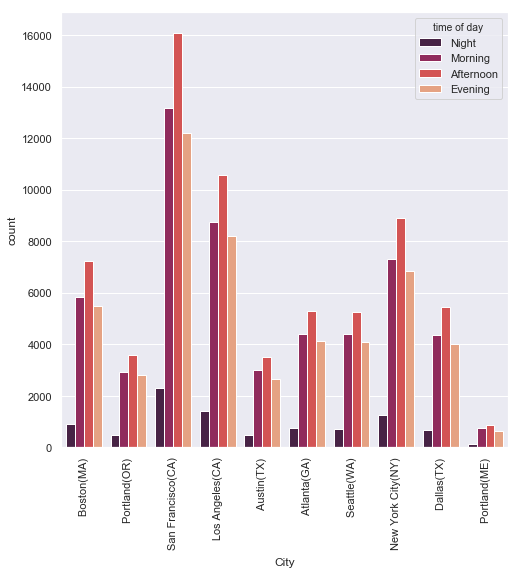

In [625]:
##Exploring the sales in each city
sns.countplot(x= df['City'],  hue=df['time of day'], palette='rocket')
plt.xticks(rotation=90)

###### By observing the above graph we can interpet that each and every city has the highest sales at afternoon and service and the billing and products should be sufficently managed to provide the good serive to them

#### Q5b: What products are mostly sold at different times of the day

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

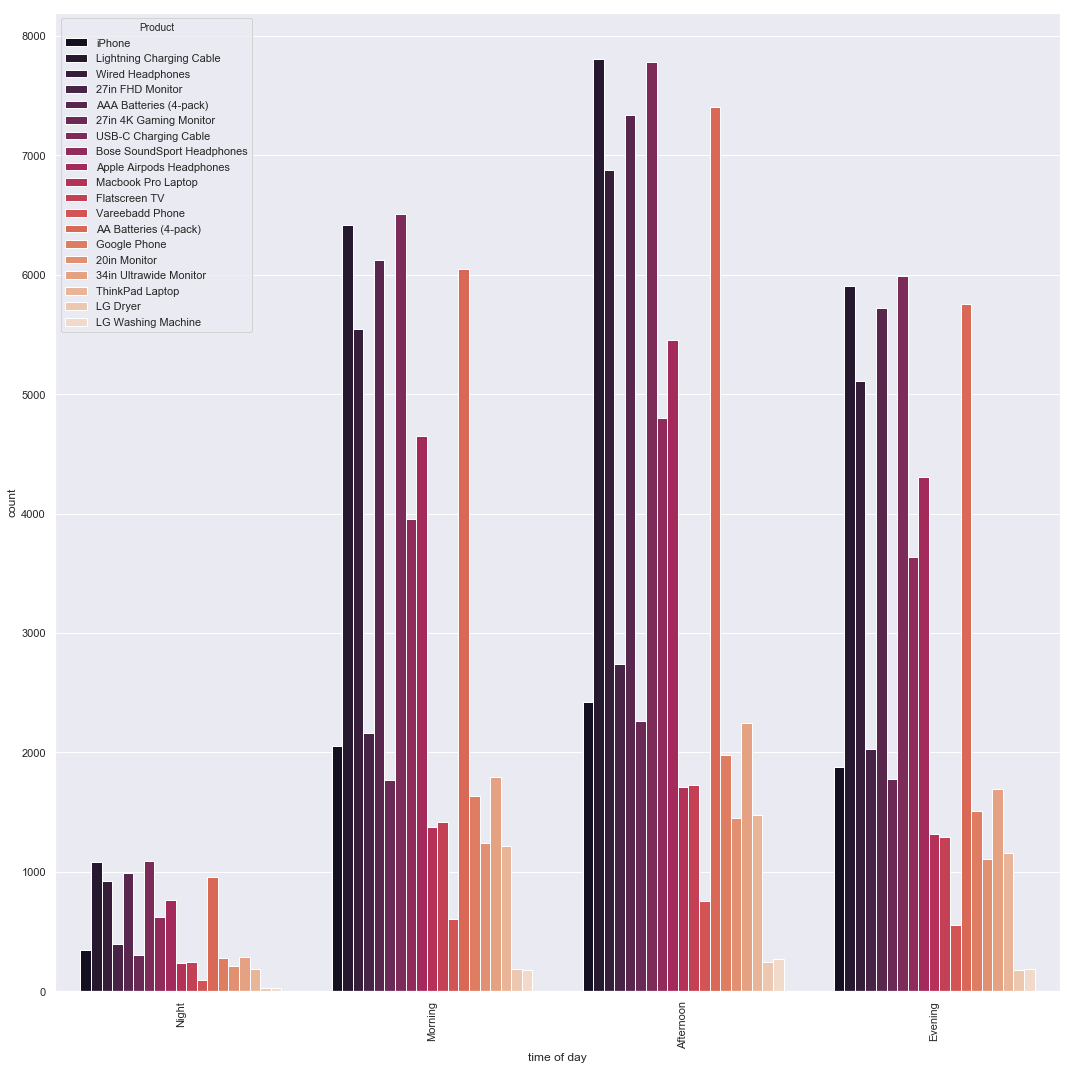

In [629]:
sns.countplot(x=df['time of day'] , hue=df['Product'], palette='rocket')
sns.set(rc={'figure.figsize':(18,18)})
plt.xticks(rotation=90)

#### It's been clearly observing that the USB Type C is the most selling product purchased to the customers

#### Night higest sales are for the USB type C
#### Morning higest sales are for the USB type C
#### Afternoon higest sales are for the lighting charging cable
#### Evening higest sales are for the USB type C


#### Based on the insights we can get a conculsion that Afternoon sales are highest among all the times in a day

## Q6:Find Out the pair of products that are most sold together.

In [639]:
df['Grouped']=df.groupby("Order ID")['Product'].transform(lambda x:','.join(x))
df2 = df[['Order ID','Grouped']].drop_duplicates()     

In [641]:
from itertools import combinations
from collections import Counter

count= Counter()
for row in df['Grouped']:
    row_list = row.split(',')
    
    count.update(Counter(combinations(row_list,2)))
for key, value in count.most_common(10):
    print(key,value)
    


('iPhone', 'Lightning Charging Cable') 2127
('Google Phone', 'USB-C Charging Cable') 2106
('iPhone', 'Wired Headphones') 987
('Google Phone', 'Wired Headphones') 943
('iPhone', 'Apple Airpods Headphones') 799
('Vareebadd Phone', 'USB-C Charging Cable') 773
('Google Phone', 'Bose SoundSport Headphones') 503
('USB-C Charging Cable', 'Wired Headphones') 446
('Vareebadd Phone', 'Wired Headphones') 327
('Lightning Charging Cable', 'Wired Headphones') 253


In [642]:
duplicates= df[df.duplicated('Order ID', keep=False)].filter(['Order ID','Product'])
df2=duplicates.groupby('Order ID')['Product'].apply(','.join).reset_index()

df3=df2['Product'].value_counts()[:20]



In [643]:
# changing the Order ID datatype to int
df['Order ID'] = df['Order ID'].astype('int')

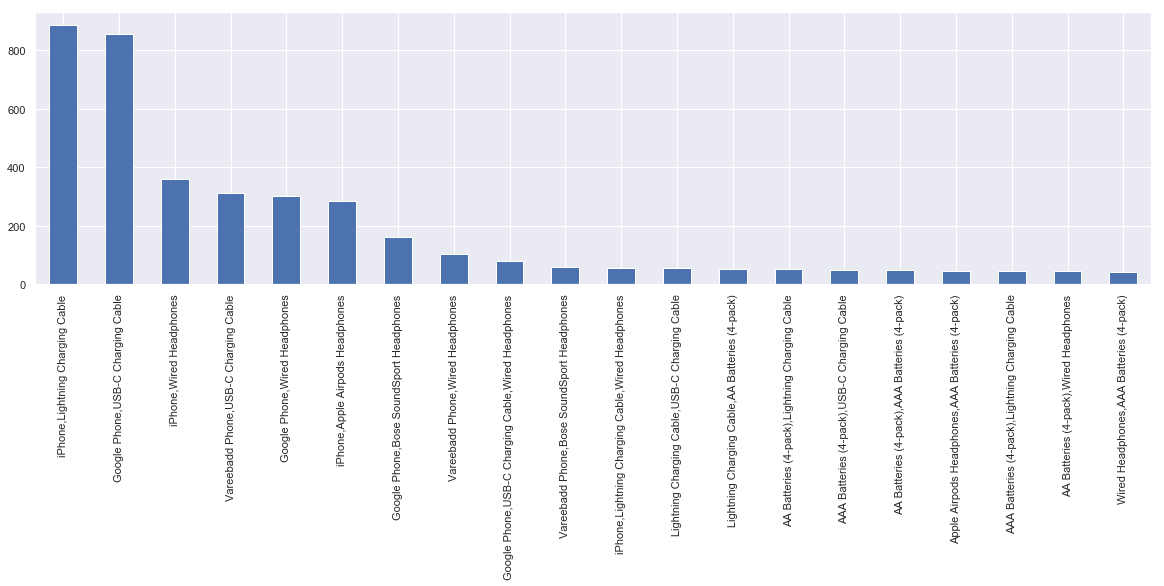

In [644]:
df3.plot(kind='bar', figsize=(20,5))

##### Summary: Iphone & Lighting charging cable is the most selling combo, and the Google Phoneand USB- charging is the second most selling comb , providing a 10% to 15 % for the discounts for both this combos that leads to a great sales hike and also high profit margins.

